# Notebook  9 - Travelling Salesman Problem

Questa lezione mira a risolvere il Travelling Salesman Problem per $34$ utilizzando un algoritmo genetico. L'obiettivo è determinare un percorso ideale che minimizzi la distanza tra un numero arbitrario di siti (città) posizionate su una circonferenza o all'interno di un quadrato.

   - [  9.0 - Formalizzazione del problema ](#ex-9.0) 

   - [  9.1 - Cammino Circolare ](#ex-9.1) 
   
   - [  9.2 - Cammino Quadrato ](#ex-9.2)
   

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

<a id="ex-9.0"></a>
## Esercizio 9.0. - Formalizzazione del Problema

### Il problema del Travelling Salesman
Il problema del Travelling Salesman consiste nel determinare quale sia il percorso migliore, dato un numero di città, che visiti ognuna delle città una volta sola, tornando al punto iniziale. Il percorso tra una città e quella successiva è un segmento rettilineo. Le $34$ città sono rappresentate dalle loro coordinate, quindi sono espresse come dei vettori $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, e la distanza tra di loro può essere determinata indifferentemente con la norma $L^{(1)}$ o $L^{(2)}$, secondo le definizioni: 

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

La questione fondamentale sarà quindi determinare la permutazione delle città che minimizzi questa quantità. In questo Notebook si è utilizzata principalmente la norma $L^{(1)}$, ma nel codice è implementata anche $L^{(2)}$ e verranno mostrati alcuni risultati anche con essa.

### Oggetti del problema
Le città sono fornite attraverso le loro coordinate, dunque per rappresentarle si è utilizzata una classe `Punto.h`, che formalizza i punti in un piano bidimensionale. La classe contiene tutti i metodi di assegnazione e l'estensione degli operatori `+`,`-`,`+=`, necessari per calcolare le distanze tra le varie città. Le posizioni delle città vengono salvate in un array dinamico di Punti, denominato `cities`.
</br>

Per formalizzare una possibile soluzione del problema si è utilizzato un array di interi, anche detto <b> cromosoma </b>, contenente tutti gli interi da $1$ a $34$, ognuno dei quali è detto <b> gene </b>, dove l'ordine dell'array rappresenta l'ordine in cui vanno visitate le città. Da ognuno di questi array, tramite il metodo `Lenght()`, è possibile determinare la lunghezza del percorso associato. Questa grandezza sarà il discrimine di quali cromosomi/percorsi sono migliori e quali peggiori, e prende il nome di `fitness`. C'è un ulteriore metodo di controllo, `Check()`, che si occupa di verificare che il primo elemento sia sempre $1$ e che compaiano effettivamente tutte le città senza ripetizioni (controllando la somma).

</br>
Le possibili soluzioni sono strutturate in un array di cromosomi, detto <b> popolazione </b>. Alla popolazione è associato un array di double, che associa ad ogni elemento dell'array la rispettiva fitness. In questo modo il codice contiene tutte le informazioni necessarie su ogni soluzione e la rispettiva bontà.

### Algoritmo Genetico
L'algoritmo genetico consiste nel far evolvere la popolazione privilegiando gli individui migliori (secondo il principio Darwiniano del <i> survival of the fittest </i>). Facendo evolvere la popolazione per una serie di generazioni, gli individui peggiori vengono sostituiti, e la soluzione migliora progressivamente. I passi adottati sono i seguenti:

- <b> Creazione della popolazione </b>: Vengono creati randomicamente $M=5000$ cromosomi, che vengono immagazzinati nell'array di popolazione. Viene controllato che ognuno dei cromosomi rispetti le condizioni di correttezza.
- <b> Ordinamento della popolazione </b>: Viene valutata la `fitness` per ogni cromosoma, e la popolazione viene ordinata per fitness decrescente.
- <b> Evoluzione della popolazione </b>: La popolazione viene fatta evolvere in una generazione successiva selezionando due individui (genitori) e attuando il `Crossover()`. Attraverso il metodo `Selection()` vengono selezionati due indici con una legge di potenza che favorisca i primi elementi dell'array ordinato rispetto agli ultimi. Questi due indici, `lavusca` e `dizanoli`, vengono poi utilizzati per il crossover, che funziona nel seguente modo. I due genitori vengono tagliati allo stesso indice, e mentre le teste vengono conservate, le code vengono riempite con gli elementi mancanti, prendendoli nell'ordine in cui appaiono nell'altro genitore.
- <b> Mutazione della popolazione </b>: Attraverso il metodo `Mutate()` alla popolazione vengono applicate delle <i> mutazioni </i>, ovvero delle modifiche casuali all'ordine dei geni. Le mutazioni avvengono con probabilità del $10\%$, e possono essere una (o più) tra le seguenti:
    - <i> Scambio </i>: Vengono selezionati due geni all'interno del cromosoma e vengono scambiati tra di loro
    - <i> Shift </i>: Viene selezionato un blocco di geni all'interno del cromosoma e viene shiftato in avanti, reinserendo dalla testa gli elementi che escono dalla coda.
    - <i> Permutazione </i>: Vengono selezionati due blocchi all'interno del cromosoma e vengono scambiati tra di loro.
    - <i> Inversione </i>: Viene selezionato un blocco di geni e viene invertito, ovvero viene specchiato e reinserito al posto del blocco originario.
   
- <b> Controllo </b>: Viene verificato che tutti gli individui della nuova generazione rispettino le condizioni necessarie, e la nuova generazione viene salvata, per poi ricominciare il procedimento.

I risultati presentati in questo Notebook sono stati ottenuti per $1000$ generazioni, ognuna delle quali composta da una popolazione di $5000$ cromosomi. 

<a id="ex-9.1"></a>
## Esercizio 9.1. - Cammino Circolare
Nel primo esercizio di questo Notebook si sono generate $34$ città su una circonferenza. I risultati sono i seguenti:

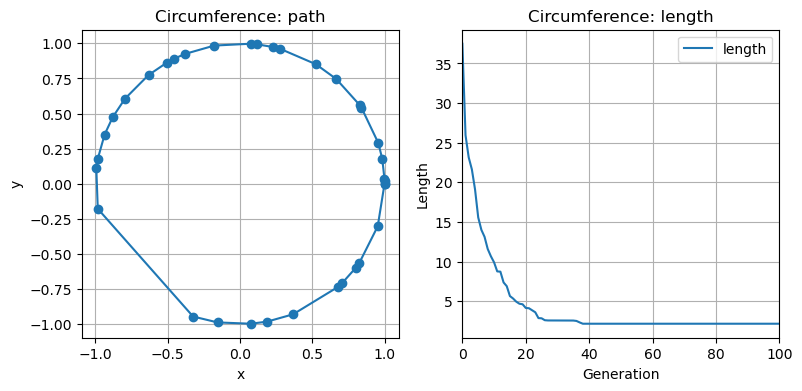

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
x, y = np.loadtxt("Exercise09-1/circular/path_10.txt", usecols=(0, 1), unpack='true')
axes[0].plot(x, y, marker='o')
axes[0].set_title('Circumference: path')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True)

x, y = np.loadtxt("Exercise09-1/circular/best_individuals_10.txt", usecols=(0, 1), unpack='true')
axes[1].plot(x, y, label = "length")
axes[1].set_title('Circumference: length')
axes[1].set_xlim(0,100)
axes[1].set_xlabel('Generation')
axes[1].set_ylabel('Length')
axes[1].grid(True)
axes[1].legend()
plt.show()


Il risultato migliore è quello prevedibile: visitare tutte le città seguendo la circonferenza. Si vede che effettivamente l'algoritmo genetico riesce a trovare questo risolto, e anche abbstanza velocemente. Infatti il secondo grafico mostra la lunghezza dell'individuo migliore in funzione della generazione: il grafico è stato tagliato alla generazione $100$ per mostrare meglio la velocità di convergenza: già alla ventesima generazione si è molto vicini al risultato ottimale.

### Importanza delle mutazioni
Già introdotte nella sezione [9.0](#ex-9.0), le mutazioni giocano in realtà un ruolo molto più importante di quello che può apparire. Per studiarlo, si è provato ad eseguire la simulazione modificandone le probabilità. Come mostrano i grafici sottostanti, senza applicare le mutazioni non si riesce a raggiungere il risultato migliore, ma l'algorito si stabilizza su un risultato peggiore. Questo perchè senza mutazioni, l'evoluzione della popolazione viene solamente dal crossover tra i genitori, e dunque il patrimonio genetico di partenza ha un ruolo molto più importante nella determinazione del risultato finale. Eventuali difetti dei genitori vengono trasmessi ai figli e senza l'introduzione di un elemento di casualità non c'è la possibilità che sorgano individui in cui le mutazioni hanno eliminato tale difetto.

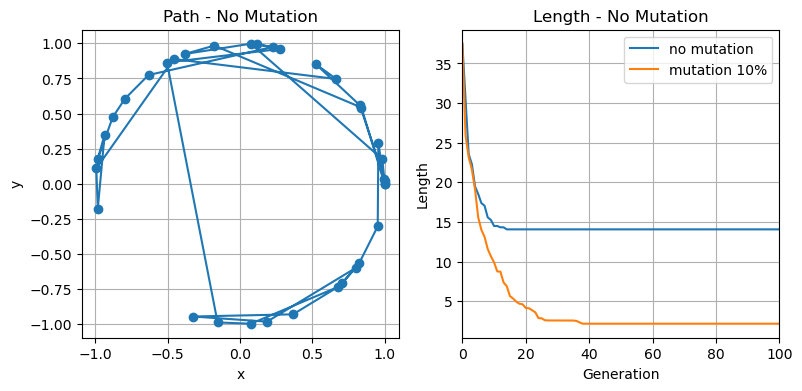

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

x, y = np.loadtxt("Exercise09-1/circular/path_nomut.txt", usecols=(0, 1), unpack='true')
axs[0].plot(x, y, marker='o')
axs[0].set_title('Path - No Mutation')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].grid(True)

x, y = np.loadtxt("Exercise09-1/circular/best_individuals_nomut.txt", usecols=(0, 1), unpack='true')
x_best, y_best = np.loadtxt("Exercise09-1/circular/best_individuals_10.txt", usecols=(0, 1), unpack='true')
axs[1].plot(x, y, label = "no mutation")
axs[1].plot(x_best, y_best, label = "mutation 10%")
axs[1].set_title('Length - No Mutation')
axs[1].set_xlim(0,100)
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Length')
axs[1].grid(True)
axs[1].legend()
plt.show()

<a id="ex-9.2"></a>
## Esercizio 9.2. - Cammino Quadrato
Nel secondo esercizio di questo Notebook si sono generate $34$ città all'interno di un quadrato. In questo caso, diversamente dalla circonferenza, non si ha la possibilità di confrontare la lunghezza del cammino con una lunghezza ideale, dunque i risultati sono presentati senza possibilità di verificarne la qualità. Tuttavia, determinati criteri per dare un giudizio sono intuitivi, come lil basso numero di intersezioni nel percorso o l'assenza di percorsi in cui si va "avanti e indietro". Tali criteri, seppur qualitativi, guideranno il giudizio dei risultati.

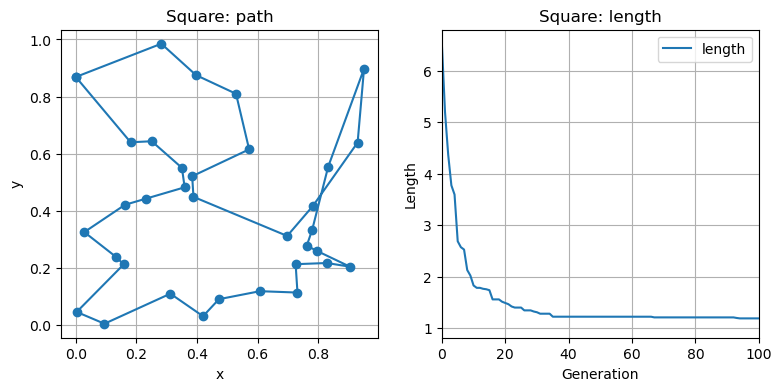

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
x, y = np.loadtxt("Exercise09-1/square/path_10.txt", usecols=(0, 1), unpack='true')
axes[0].plot(x, y, marker='o')
axes[0].set_title('Square: path')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True)

x, y = np.loadtxt("Exercise09-1/square/best_individuals_10.txt", usecols=(0, 1), unpack='true')
axes[1].plot(x, y, label = "length")
axes[1].set_title('Square: length')
axes[1].set_xlim(0,100)
axes[1].set_xlabel('Generation')
axes[1].set_ylabel('Length')
axes[1].grid(True)
axes[1].legend()
plt.show()


I criteri annunciati sono verosimilmente rispettati, dunque si può definire soddisfacente il risultato. Per completezza si riporta anche per questo caso il grafico per la simulazione attuata in assenza di mutazioni.

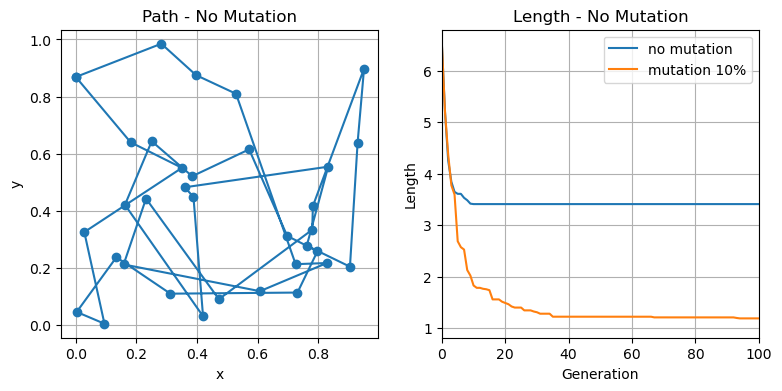

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

x, y = np.loadtxt("Exercise09-1/square/path_nomut.txt", usecols=(0, 1), unpack='true')
axs[0].plot(x, y, marker='o')
axs[0].set_title('Path - No Mutation')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].grid(True)

x, y = np.loadtxt("Exercise09-1/square/best_individuals_nomut.txt", usecols=(0, 1), unpack='true')
x_best, y_best = np.loadtxt("Exercise09-1/square/best_individuals_10.txt", usecols=(0, 1), unpack='true')
axs[1].plot(x, y, label = "no mutation")
axs[1].plot(x_best, y_best, label = "mutation 10%")
axs[1].set_title('Length - No Mutation')
axs[1].set_xlim(0,100)
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Length')
axs[1].grid(True)
axs[1].legend()
plt.show()